In [95]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from collections import Counter
import pickle

In [96]:
dataset = pd.read_csv("E:\\Nupur\\BEI-III-II\\MinorProject\\Heart\\healthcare-dataset-stroke-data - Copy.csv")
dataset.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart rate,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,87,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,90,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,88,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,84,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,83,1


In [97]:
print(dataset.isnull().sum()) #finding column with NaN values

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
heart rate             0
stroke                 0
dtype: int64


In [98]:
dataset['bmi'].fillna(dataset['bmi'].mean(),inplace = True) #filling missing bmi with mean values

In [99]:
print(dataset.isnull().sum()) #finding column with NaN values

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
heart rate           0
stroke               0
dtype: int64


In [100]:
y = dataset.stroke
X = dataset.iloc[:,1:-1]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart rate
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,87
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,90
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,88
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,84
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,83


In [101]:
y.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [102]:
#OneHotEncoding
dm_X=pd.get_dummies(X)
X=dm_X
dm_X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,heart rate,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.600000,87,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.893237,90,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.500000,88,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.400000,84,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.000000,83,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


In [103]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.9,test_size = 0.1,random_state =10)

In [104]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([4374,  225], dtype=int64))

In [105]:
np.unique(y_train, return_counts=True)[1] / len(y_train)

array([0.95107632, 0.04892368])

In [106]:
class DecisionTree:
    def __init__(self, X, y, indices=None, min_samples_leaf=5):
        # use all rows for root node
        if indices is None:
            indices = np.arange(len(y))

        self.X = X
        self.y = y
        self.indices = indices
        self.min_samples_leaf = min_samples_leaf

        self.n_samples, self.n_features = len(indices), X.shape[1]
        self.value = self.calculate_class_probabilities(self.y, self.indices)
        self.gini = self.gini_impurity(self.y)
        self.score = float("inf")
        self.find_feature_split()

    def find_feature_split(self):
        for i in range(self.n_features):
            self.find_better_split(i)

        if self.is_leaf:
            return

        X = self.split_feature
        # grab indices for left and right nodes
        lhs = np.nonzero(X <= self.split)[0]
        rhs = np.nonzero(X > self.split)[0]
        # recursively calculate decision trees for all nodes
        self.lhs = DecisionTree(self.X, self.y, self.indices[lhs])
        self.rhs = DecisionTree(self.X, self.y, self.indices[rhs])

    def find_better_split(self, feature_index):
        X, y = self.X.values[self.indices, feature_index], self.y.values[self.indices]

        sorted_indices = np.argsort(X)
        y_sorted, X_sorted = y[sorted_indices], X[sorted_indices]
        index = 0

        for i in range(0, self.n_samples - self.min_samples_leaf):
            index += 1
            Xi = X_sorted[i]
            # continue if stopping criterion not reached
            if i < self.min_samples_leaf - 1 or Xi == X_sorted[i + 1]:
                continue

            # calculate Gini impurities for left and right nodes
            lhs_gini = self.gini_impurity( y_sorted[:index])
            rhs_gini = self.gini_impurity( y_sorted[index:])
            # calculate score for current split point
            curr_score = lhs_gini * len(y_sorted[:index]) / len(y_sorted) + rhs_gini * len(y_sorted[index:]) / len(
                y_sorted
            )
            # update attributes if new score is smaller than old
            if curr_score < self.score:
                self.feature_index, self.score, self.split, self.gini = (
                    feature_index,
                    curr_score,
                    X_sorted[i],
                    self.gini_impurity( y),
                )

    def calculate_class_probabilities(self, y: pd.Series, indices: np.ndarray):
        probs = np.unique(y.iloc[indices], return_counts=True)[1] / len(y.iloc[indices])

        # handle edge case when leaf only contains one sample
        if len(probs) == 1:
            if int(y.iloc[indices].values[0]) == 0:
                value = np.array([1.0, 0.0])
            else:
                value = np.array([0.0, 1.0])
        else:
            value = probs

        return value

    def gini_impurity(self, y):
        return 1.0 - np.sum((np.unique(y, return_counts=True)[1] / len(y)) ** 2)

    def predict(self, X):
        return np.array([self.predict_row(Xi) for Xi in X])

    def predict_row(self, Xi):
        if self.is_leaf:
            return np.argmax(self.value,axis=0)
        t = self.lhs if Xi[self.feature_index] <= self.split else self.rhs
        return t.predict_row(Xi)

    @property
    def split_name(self):
        return self.X.columns[self.feature_index]

    @property
    def split_feature(self):
        return self.X.values[self.indices, self.feature_index]

    @property
    def is_leaf(self):
        return self.score == float("inf")

    # convert object to string - see https://dbader.org/blog/python-repr-vs-str
    def __repr__(self):
        s = f"n_samples: {self.n_samples}; value: {self.value}; gini: {self.gini}"
        if not self.is_leaf:
            s += f"; score: {self.score}; feature: {self.split_name}; split_point: {self.split}"
        return s

In [107]:
class TreeEnsemble:
    # instance attributes
    def __init__(
        self, X: np.ndarray, y: np.ndarray, n_trees: int, sample_size: int, min_samples_leaf: int = 5,
    ):
        # use constant random seed for testing
        np.random.seed(42)
        self.X = X
        self.y = y
        self.n_trees = n_trees
        self.sample_size = sample_size
        self.min_samples_leaf = min_samples_leaf

        self.trees = [self.create_tree() for i in range(n_trees)]

    # instance method
    def create_tree(self):
        # grab random subsample without replacement - no bootstrapping!
        random_indices = np.random.permutation(len(self.y))[: self.sample_size]
        return DecisionTree(
            self.X.iloc[random_indices], self.y.iloc[random_indices], min_samples_leaf=self.min_samples_leaf,
        )

    # instance method
    def predict(self, X):
     
        return np.argmax(np.array([t.predict(X) for t in self.trees], axis=0))

In [108]:
tree = TreeEnsemble(X_train, y_train, n_trees=5, sample_size=5000).trees[0]
X_samp, y_samp = tree.X, tree.y

preds = tree.predict(X_valid.values)


In [109]:
print(preds)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [110]:
from sklearn.metrics import roc_curve  
import matplotlib.pyplot as plt 
# evaluate
# roc_auc_score(y_valid, probs)
def plot_roc_curve(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

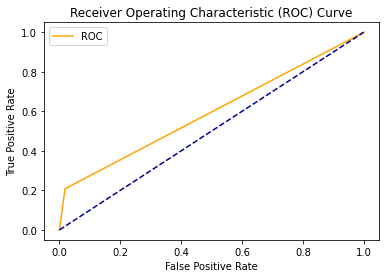

In [111]:
fper, tper, thresholds = roc_curve(y_valid, preds) 
plot_roc_curve(fper, tper)

In [112]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_valid,preds)
print(mae)

0.0547945205479452


In [113]:
from sklearn.metrics import precision_score


precision1 = precision_score(y_valid,preds,average = 'binary')
print('%.2f%%'%(precision1*100))

35.71%


In [114]:
from sklearn.metrics import f1_score

fscore1 = f1_score(y_valid,preds,average = 'binary')

print('%.2f%%'%(fscore1*100))

26.32%


In [115]:
from sklearn.metrics import recall_score

recall1 = recall_score(y_valid,preds,average = 'binary')
print('%.2f%%'%(recall1*100))

20.83%


In [116]:
from sklearn.metrics import accuracy_score

accuracy1 = accuracy_score(y_valid,preds )
print('%.2f%%'%(accuracy1*100))


94.52%


In [117]:
y = dataset.stroke
X = dataset.iloc[:,1:-1]
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,heart rate
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,87
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,90
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,88
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,84
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,83


In [118]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y,train_size = 0.9,test_size = 0.1,random_state =10)

In [119]:
from imblearn.over_sampling import SMOTENC
smote = SMOTENC(random_state = 10,categorical_features = [0,2,3,4,5,6,9])

In [120]:
X_train_smote, y_train_smote = smote.fit_resample(X_train,y_train)

In [121]:
from collections import Counter
print("Before SMOTE y_train :" , Counter(y_train))
print("After SMOTE y_train:" , Counter(y_train_smote))


Before SMOTE y_train : Counter({0: 4374, 1: 225})
After SMOTE y_train: Counter({0: 4374, 1: 4374})


In [122]:
y_train_smote.value_counts()


0    4374
1    4374
Name: stroke, dtype: int64

In [123]:
X_train_smote.gender.value_counts()

Female    4959
Male      3789
Name: gender, dtype: int64

In [124]:
oversampled_data = X_train_smote.join(y_train_smote)
oversampled_data.to_csv(r"E:\\Nupur\\BEI-III-II\\MinorProject\\Heart\\oversampled.csv")


In [125]:

y = oversampled_data.stroke
X = oversampled_data.iloc[:,1:-1]

In [126]:
#OneHotEncoding
dm_X=pd.get_dummies(X)
X=dm_X
dm_X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,heart rate,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,69.0,0,0,83.55,28.300000,65,0,1,0,0,0,1,0,0,1,0,1,0,0
1,63.0,1,0,81.54,24.200000,67,0,1,0,0,1,0,0,0,1,0,0,1,0
2,16.0,0,0,87.98,22.400000,46,1,0,0,0,1,0,0,0,1,0,0,1,0
3,63.0,0,1,82.72,28.893237,63,0,1,0,0,0,1,0,0,1,0,0,1,0
4,13.0,0,0,92.65,31.700000,72,1,0,0,0,0,0,1,0,1,0,0,1,0


In [127]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_smote,y_train_smote,train_size = 0.9,test_size = 0.1,random_state =10)

In [128]:
tree = TreeEnsemble(X_train, y_train, n_trees=5, sample_size=9000).trees[0]
X_samp, y_samp = tree.X, tree.y

# calculate class probabilities
preds = tree.predict(X_valid.values)

In [129]:
accuracy2 = accuracy_score(y_valid,preds )
print('%.3f%%'%(accuracy2*100))


85.371%


In [130]:
recall2 = recall_score(y_valid,preds,average = 'binary')
print('%.3f%%'%(recall2*100))


86.064%


In [131]:
fscore2 = f1_score(y_valid,preds,average = 'binary')

print('%.3f%%'%(fscore2*100))

84.615%


In [132]:
precision2 = precision_score(y_valid,preds,average = 'binary')
print('%.3f%%'%(precision2*100))

83.215%


In [133]:
mae = mean_absolute_error(y_valid,preds)
print(mae)

0.1462857142857143


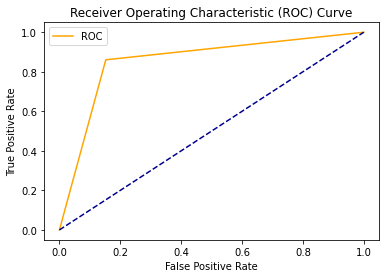

In [134]:
fper, tper, thresholds = roc_curve(y_valid, preds) 
plot_roc_curve(fper, tper)

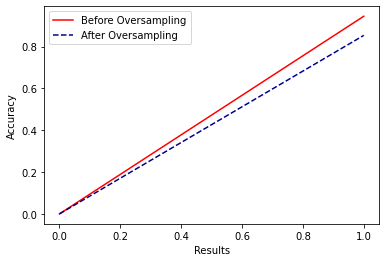

In [135]:
xpoints = np.array([0, accuracy1])
ypoints = np.array([0, accuracy2])
plt.plot(xpoints, color='red', label='Before Oversampling')
plt.plot( ypoints, color='darkblue', linestyle='--',label='After Oversampling')
plt.xlabel('Results')
plt.ylabel('Accuracy')

plt.legend()
plt.plot()
plt.show()


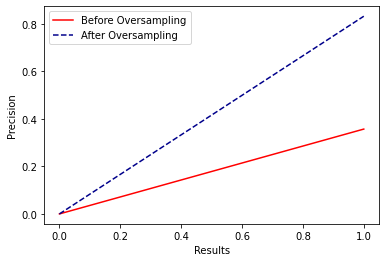

In [136]:

xpoints = np.array([0, precision1])
ypoints = np.array([0, precision2])
plt.plot(xpoints, color='red', label='Before Oversampling')
plt.plot( ypoints, color='darkblue', linestyle='--',label='After Oversampling')
plt.xlabel('Results')
plt.ylabel('Precision')

plt.legend()
plt.plot()
plt.show()


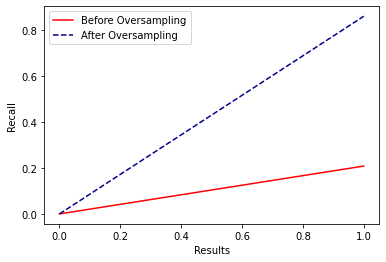

In [137]:
xpoints = np.array([0, recall1])
ypoints = np.array([0, recall2])
plt.plot(xpoints, color='red', label='Before Oversampling')
plt.plot( ypoints, color='darkblue', linestyle='--',label='After Oversampling')
plt.xlabel('Results')
plt.ylabel('Recall')

plt.legend()
plt.plot()
plt.show()

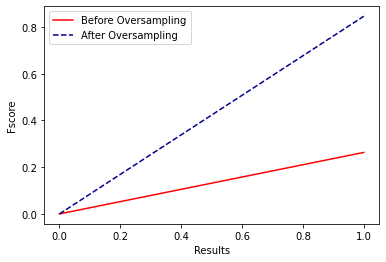

In [138]:
xpoints = np.array([0, fscore1])
ypoints = np.array([0, fscore2])
plt.plot(xpoints, color='red', label='Before Oversampling')
plt.plot( ypoints, color='darkblue', linestyle='--',label='After Oversampling')
plt.xlabel('Results')
plt.ylabel('Fscore')

plt.legend()
plt.plot()
plt.show()